In [1]:
# Random Oversampling --- duplicates data points from the minority class at random

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [5]:
!pip install -U  imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from imblearn.over_sampling import RandomOverSampler

In [7]:
from imblearn import under_sampling, over_sampling

In [8]:
x,y = make_blobs(n_samples=1600, centers=[(0,0),(5,5)],n_features=2, cluster_std=1.5 )

In [11]:
x =  pd.DataFrame(x, columns = ["var_a", "var_b"])

In [12]:
y= pd.Series(y)

In [13]:
x

var_a     var_b
0     0.552604  0.967272
1     0.631468 -2.284126
2     3.011138  5.534490
3     5.143772  2.150937
4     4.752783  6.500092
...        ...       ...
1595  2.450586  6.521296
1596  5.937482  6.736190
1597  3.678807  4.779587
1598  0.944685  0.135844
1599 -0.975447  0.112447

[1600 rows x 2 columns]

In [14]:
y

0       0
1       0
2       1
3       1
4       1
       ..
1595    1
1596    1
1597    1
1598    0
1599    0
Length: 1600, dtype: int32

In [15]:
x = pd.concat([x[y==0],x[y==1].sample(200,random_state=42)], axis=0)

In [16]:
y = y.loc[x.index]

Text(0.5, 1.0, 'TOY Dataset')

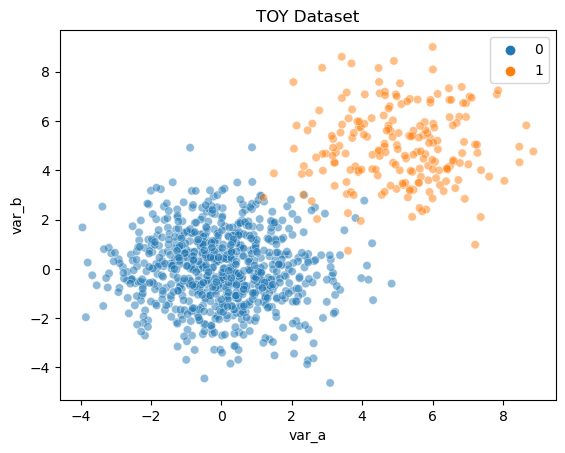

In [18]:
sns.scatterplot(data=x, x= "var_a", y="var_b", hue=y, alpha=0.5)
plt.title('TOY Dataset')

In [19]:
ros  = RandomOverSampler(sampling_strategy='auto', random_state=0)

In [20]:
x_ref, y_ref = ros.fit_resample(x,y) 

In [21]:
x.shape

(1000, 2)

In [22]:
y.shape

(1000,)

In [23]:
x_ref.shape

(1600, 2)

In [24]:
y_ref.shape

(1600,)

In [25]:
y.value_counts()

0    800
1    200
dtype: int64

In [26]:
y_ref.value_counts()

0    800
1    800
dtype: int64

Text(0.5, 1.0, 'Over Sample Dataset')

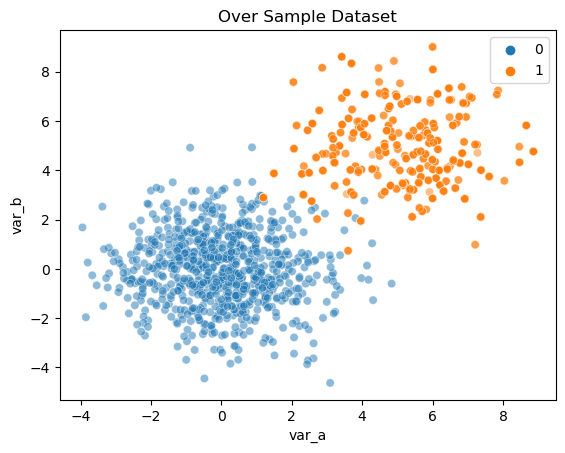

In [28]:
sns.scatterplot(data=x_ref, x= "var_a", y="var_b", hue=y_ref, alpha=0.5)
plt.title('Over Sample Dataset')

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)

In [31]:
x_res, y_res = sm.fit_resample(x,y)

In [32]:
x.shape

(1000, 2)

In [33]:
y.shape

(1000,)

In [34]:
x_res.shape

(1600, 2)

In [35]:
y_res.shape

(1600,)

Text(0.5, 1.0, 'SMOTE')

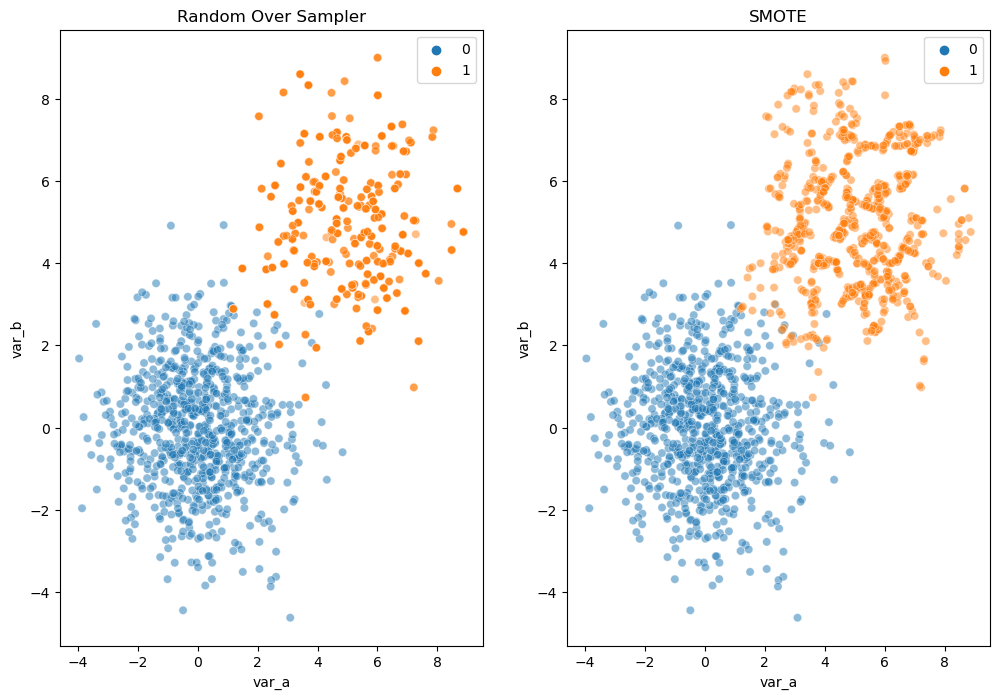

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.scatterplot(data=x_ref, x= "var_a", y="var_b", hue=y_ref, alpha=0.5)
plt.title('Random Over Sampler')
plt.subplot(122)

sns.scatterplot(data=x_res, x= "var_a", y="var_b", hue=y_res, alpha=0.5)
plt.title('SMOTE')